In [1]:
using Random
include("src/plotting_utils.jl")
include("src/guillotine_utils.jl")

sorted2midpoints (generic function with 1 method)

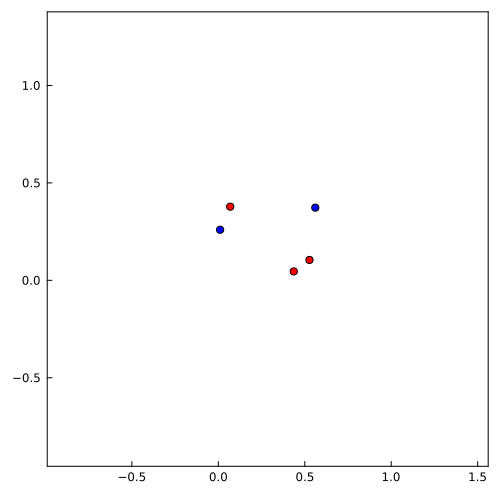

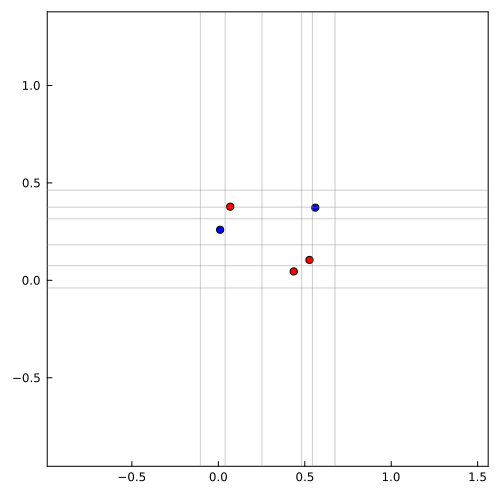

In [28]:
n = 5

S = rand(n,2)

w = rand([-1,1], n)

p1 = plot_rb_points(S, w)

sortperm_x = sortperm(S[:, 1])
sorted_x = S[sortperm_x, 1]
midpoints_x = sorted2midpoints(sorted_x)

sortperm_y = sortperm(S[:, 2])
sorted_y = S[sortperm_y, 2]
midpoints_y = sorted2midpoints(sorted_y)

p2 = plot_rb_points(S, w)
vline!(midpoints_x, color=:gray, alpha = .4)
hline!(midpoints_y, color=:gray, alpha = .4)

display(p1)
display(p2)

In [6]:
Disc_ijkl(i,j,k,l) = abs(sum(w[intersect(sortperm_x[i:j-1],sortperm_y[k:l-1])]))
Count_ijkl(i,j,k,l) = length(intersect(sortperm_x[i:j-1],sortperm_y[k:l-1]))

Count_ijkl (generic function with 1 method)

In [29]:
## V4

###########
open("file4.txt","w") do io
###########
    
inf = 100
C = 100*ones(Int,n+1,n+1,n+1,n+1)
for i=1:n
    for k=1:n
        if Disc_ijkl(i,i+1,k,k+1) == 1
            C[i,i+1,k,k+1] = 1
        end
    end
end

function pyramidprint(C,label,io)
    println(io,"\n"*label)
    for i = 1:n
        println(io,"--------------------------------------   i = $i")
        for j = i+1:n+1
            println(io,"                                 j = $j")
            for k = 1:n
                print(io,"k = $(lpad(k,2," ")) -->  ")
                for l = k+1:n+1
                    print(io,lpad(C[i,j,k,l], 4, " "))
                end
                println(io,"")
            end

        end
    end
    println(io,"--------------------------------------\n")
end
pyramidprint(C,"Inicializacion de C[i,j,k,l]",io)
    
    
for p = 3:2n
    for q = 1:p-1
        if q <= n && (p-q) <= n    
            for x = 1:n-q+1
                for y = 1:n-p+q+1
                    i = x
                    k = y
                    j = x + q
                    l = y + p - q
                    if C[i,j,k,l] == inf
                        println(io,"..... C[$i,$j,$k,$l] == inf")
                        println(io,"..... Discr($i,$j,$k,$l) == $(Disc_ijkl(i,j,k,l))") 
                        println(io,"..... Count($i,$j,$k,$l) == $(Count_ijkl(i,j,k,l))")    
                        mini_s_cc = zeros(Int,j-i-1)
                        mini_s_cd = zeros(Int,j-i-1)
                        mini_s_dc = zeros(Int,j-i-1)
                        mini_s_dd = zeros(Int,j-i-1)
                        mini_t_cc = zeros(Int,l-k-1)
                        mini_t_cd = zeros(Int,l-k-1)
                        mini_t_dc = zeros(Int,l-k-1)
                        mini_t_dd = zeros(Int,l-k-1)
                        for s = i+1:j-1
                            mini_s_cc[s-i] = minimum([C[i,s,k,l], C[s,j,k,l]])
                            mini_s_cd[s-i] = minimum([C[i,s,k,l], Disc_ijkl(s,j,k,l)])
                            mini_s_dc[s-i] = minimum([Disc_ijkl(i,s,k,l), C[s,j,k,l]])
                            mini_s_dd[s-i] = minimum([Disc_ijkl(i,s,k,l), Disc_ijkl(s,j,k,l)])
                        end
                        println(io,"......... s = i+1:j-1 = $(i+1):$(j-1)")
                        println(io,"............. mini_s_cc = min.$([[C[i,s,k,l], C[s,j,k,l]] for s = i+1:j-1]) = $mini_s_cc")
                        println(io,"............. mini_s_cd = min.$([[C[i,s,k,l], Disc_ijkl(s,j,k,l)] for s = i+1:j-1]) = $mini_s_cd")
                        println(io,"............. mini_s_dc = min.$([[Disc_ijkl(i,s,k,l), C[s,j,k,l]] for s = i+1:j-1]) = $mini_s_dc")
                        println(io,"............. mini_s_dd = min.$([[Disc_ijkl(i,s,k,l), Disc_ijkl(s,j,k,l)] for s = i+1:j-1]) = $mini_s_dd")

                        for t = k+1:l-1
                            mini_t_cc[t-k] = minimum([C[i,j,k,t], C[i,j,t,l]])
                            mini_t_cd[t-k] = minimum([C[i,j,k,t], Disc_ijkl(i,j,t,l)])
                            mini_t_dc[t-k] = minimum([Disc_ijkl(i,j,k,t), C[i,j,t,l]])
                            mini_t_dd[t-k] = minimum([Disc_ijkl(i,j,k,t), Disc_ijkl(i,j,t,l)])
                        end
                        println(io,"......... t = k+1:l-1 = $(k+1):$(l-1)")                 
                        println(io,"............. mini_t_cc = min.$([[C[i,j,k,t], C[i,j,t,l]] for t = k+1:l-1]) = $mini_t_cc")
                        println(io,"............. mini_t_cd = min.$([[C[i,j,k,t], Disc_ijkl(i,j,t,l)] for t = k+1:l-1]) = $mini_t_cd")
                        println(io,"............. mini_t_dc = min.$([[Disc_ijkl(i,j,k,t), C[i,j,t,l]] for t = k+1:l-1]) = $mini_t_dc")
                        println(io,"............. mini_t_dd = min.$([[Disc_ijkl(i,j,k,t), Disc_ijkl(i,j,t,l)] for t = k+1:l-1]) = $mini_t_dd")

                        mini = cat(Disc_ijkl(i,j,k,l),
                                mini_s_cc,
                                mini_s_cd,
                                mini_s_dc,
                                mini_s_dd,
                                mini_t_cc,
                                mini_t_cd,
                                mini_t_dc,
                                mini_t_dd,
                                dims=1)
                        println(io,"......... mini = $mini")
                            ## creo que el cout es redundante...
                        if Count_ijkl(i,j,k,l) != 0
                            C[i,j,k,l] = maximum(mini)
                        end
                        println(io,"..... C[i,j,k,l] = $(C[i,j,k,l])")
                        pyramidprint(C,"cambio de C[$i,$j,$k,$l]",io)
                    end
                end
            end
        end
    end
end

pyramidprint(C,"C[i,j,k,l] Al final",io)
println(io,"C[1,$(n+1),1,$(n+1)] = $(C[1,n+1,1,n+1])")
    
###########
end
###########

LoadError: UndefVarError: C not defined